In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_fights_stats = pd.read_csv('fight_with_stats.csv')
df_results = pd.read_csv('fight_result.csv')

In [19]:
df_fights_stats["year"] = pd.DatetimeIndex(df_fights_stats['DATE_Event']).year

In [20]:
df1 = df_fights_stats.groupby("year")["METHOD"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

In [21]:
df1.head()

,year,METHOD,percent
0,1994,Submission,65.517241
1,1994,KO/TKO - ground,24.137931
2,1994,KO/TKO - other,6.896552
3,1994,KO/TKO - clinch,3.448276
4,1995,Submission,52.941176


In [22]:
def agg_method(method):
    if method == "Submission":
        return "Submission"
    elif "KO/TKO" in method:
        return "KO/TKO"
    elif method == "Decision":
        return "Decision"
    else:
        return "Other"
        

In [23]:
agg_method('KO/TKO - ground')

'KO/TKO'

In [24]:
df1["METHOD"] = df1["METHOD"].apply(lambda x:agg_method(x))

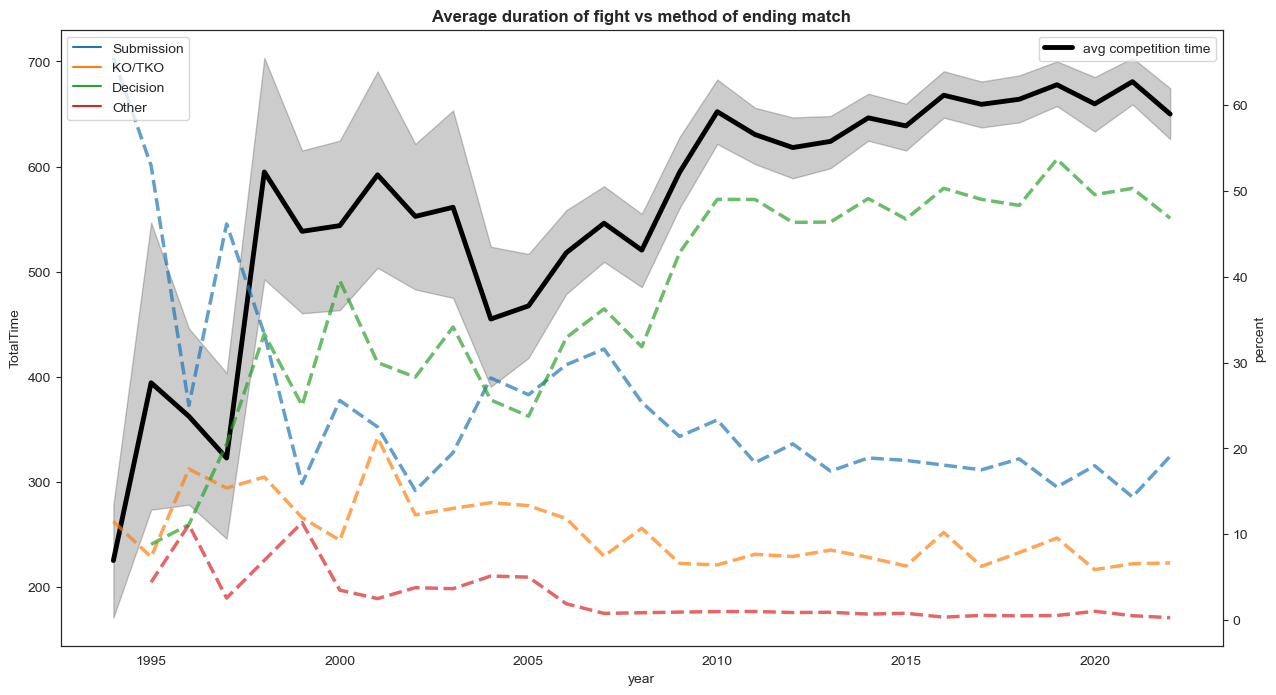

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("white")
g = sns.lineplot(x="year", y="TotalTime", data= df_fights_stats, color='black', ax=ax,linewidth = 3.5, label = "avg competition time" )
ax1=ax.twinx()
g1 = sns.lineplot(x="year",y='percent', hue ="METHOD",data=df1, linewidth = 2.5, ax=ax1,alpha=0.7,linestyle='--',ci=None)
g.set_title("Average duration of fight vs method of ending match", weight='bold')
g1.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

In [28]:
df_results['Women_fight'].sum()

627

In [45]:

fights_by_gender={"mens_fight": df_results.shape[0] - df_results['Women_fight'].sum(), "women's fights":df_results['Women_fight'].sum()}
names = list(fights_by_gender.keys())
values = list(fights_by_gender.values())

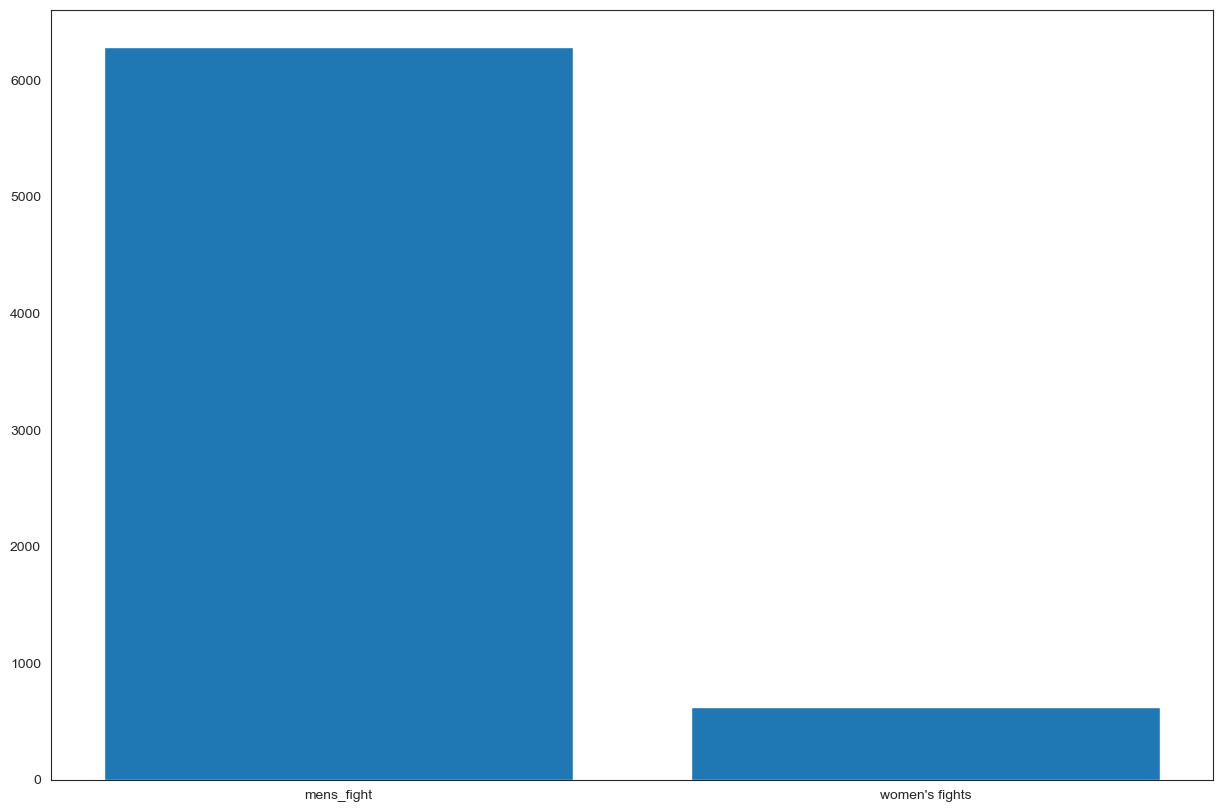

In [44]:
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(range(len(fights_by_gender)), values, tick_label=names)
plt.show()